# Creating folder structure



First of all, we'll try without data augmentation

In [12]:
input_folder = '../data/02/'
output_folder= '../data/03/original_size'
rescale_folder='../data/03/rescaled'

In [2]:
import splitfolders

splitfolders.ratio(
    input=input_folder,
    output=output_folder,
    seed=1234, 
    ratio=(.8, .1, .1)
)

Copying files: 22787 files [00:21, 1048.57 files/s]


In [14]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

rescale_width = 300

for split in os.listdir(output_folder):
    for folder in os.listdir(os.path.join(output_folder, split)):
        for file in os.listdir(os.path.join(output_folder, split, folder)):
            img = Image.open(os.path.join(output_folder, split, folder, file))
            width_percent = rescale_width / float(img.size[0])
            height_percent = rescale_width / float(img.size[1])
            width_size = int(float(img.size[0]) * float(width_percent))
            height_size = int(float(img.size[1]) * float(height_percent))
            print(img.size)
            img.resize((width_size, height_size), Image.Resampling.LANCZOS)
            dest = os.path.join(rescale_folder, split, folder)
            if not os.path.exists(dest):
                os.makedirs(dest)
            img.save(os.path.join(dest, file))
            break
        break
    break



(1280, 720)


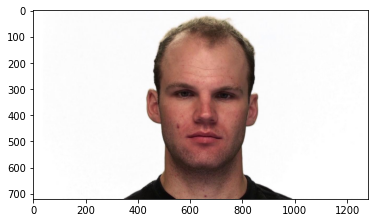

In [15]:
image = mpimg.imread(os.path.join(dest, file))
plt.imshow(image)